,risk,return
0,0.000000,0.014289
1,0.000001,0.030477
2,0.000002,0.031344
3,0.000003,0.031891
4,0.000004,0.032302
5,0.000005,0.032637
6,0.000006,0.032921
7,0.000007,0.033169
8,0.000008,0.033391
9,0.000009,0.033592


,return,risk
0,0.0145,0.00000009
1,0.0150,0.00000097
2,0.0155,0.00000279
3,0.0160,0.00000554
4,0.0165,0.00000923
5,0.0170,0.00001385
6,0.0175,0.00001941
7,0.0180,0.00002602
8,0.0185,0.00003389
9,0.0190,0.00004301


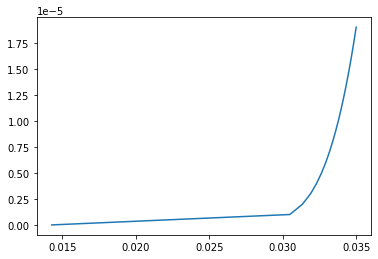

In [ ]:
import numpy as np
import cvxpy as cp
import pandas as pd
import matplotlib.pyplot as plt
import math

n = 5 #number of assets
m = 4 #number of weeks time
k = 20
y = np.matrix([[0.026900, 0.020500, 0.004360, 0.055634],            #y[i][j] is yeild of asset i at week j
               [-0.184593, 0.047840, 0.017366, 0.050033], 
               [0.228164, -0.013991, 0.001422, -0.047014], 
               [0.004354, -0.000747, 0.034091, -0.040000],
               [0.013006, 0.006726, 0.002747, 0.075694]])
E = []
for i in range(n):
  E.append(np.sum(y[i])/m)
cov_mat = np.cov(y)
W = cp.Variable(n)
Ep = cp.sum(W*E) #return
Sp = cp.quad_form(W,cov_mat) #risk
risk = []
retur = []
risk1 = []
retur1 = []
objective = cp.Maximize(Ep)
objective1 = cp.Minimize(Sp)
for i in range(k):
  min_return = 0.0145 + i/2000
  max_risk = i/1000000
  retur1.append(min_return)
  risk.append(max_risk)
  constraints = [W>=0, cp.sum(W)==1, Sp<=math.sqrt(max_risk)]
  constraints1 = [W>=0, cp.sum(W)==1, Ep>=min_return]
  prob = cp.Problem(objective, constraints)
  prob1 = cp.Problem(objective1, constraints1)
  risk1.append(format(prob1.solve(),".8f"))
  retur.append(prob.solve())
Dict = {'risk' : risk,
        'return' : retur}
dataframe = pd.DataFrame(Dict)
display(dataframe)
Dict1 = {'return' : retur1,
         'risk' : risk1}
dataframe1 = pd.DataFrame(Dict1)
display(dataframe1)
plt.plot(retur,risk)

In [ ]:
n = 4 #number of assets
m = 4 #number of weeks time
k = 20
y = np.matrix([[-0.184593, 0.047840, 0.017366, 0.050033], 
               [0.228164, -0.013991, 0.001422, -0.047014], 
               [0.004354, -0.000747, 0.034091, -0.040000],
               [0.013006, 0.006726, 0.002747, 0.075694]])
E = []
for i in range(n):
  E.append(np.sum(y[i])/m)
cov_mat = np.cov(y)
W = cp.Variable(n)
Ep = cp.sum(W*E) #return
Sp = cp.quad_form(W,cov_mat) #risk
risk2 = []
retur2 = []
risk3 = []
retur3 = []
objective = cp.Maximize(Ep)
objective1 = cp.Minimize(Sp)
for i in range(k):
  min_return = 0.0145 + i/2000
  max_risk = i/1000000
  retur3.append(min_return)
  risk2.append(max_risk)
  constraints = [W>=0, cp.sum(W)==1, Sp<=math.sqrt(max_risk)]
  constraints1 = [W>=0, cp.sum(W)==1, Ep>=min_return]
  prob = cp.Problem(objective, constraints)
  prob1 = cp.Problem(objective1, constraints1)
  risk3.append(format(prob1.solve(),".8f"))
  retur2.append(prob.solve())
Dict = {'risk' : risk2,
        'return' : retur2}
dataframe = pd.DataFrame(Dict)
display(dataframe)
Dict1 = {'return' : retur3,
         'risk' : risk3}
dataframe1 = pd.DataFrame(Dict1)
display(dataframe1)
# plt.plot(retur,risk)

,risk,return
0,0.000000,0.012290
1,0.000001,0.028745
2,0.000002,0.030055
3,0.000003,0.030765
4,0.000004,0.031274
5,0.000005,0.031676
6,0.000006,0.032013
7,0.000007,0.032303
8,0.000008,0.032560
9,0.000009,0.032791


,return,risk
0,0.0145,0.00001570
1,0.0150,0.00002357
2,0.0155,0.00003304
3,0.0160,0.00004410
4,0.0165,0.00005675
5,0.0170,0.00007102
6,0.0175,0.00008712
7,0.0180,0.00010511
8,0.0185,0.00012500
9,0.0190,0.00014678


Text(0, 0.5, 'risk')

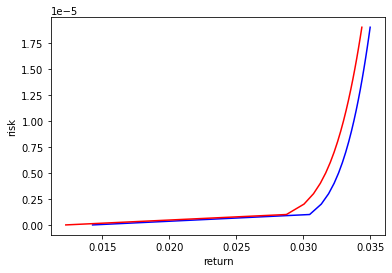

In [ ]:
plt.plot(retur,risk,color = 'b')
plt.plot(retur2,risk,color = 'r')
plt.xlabel("return")
plt.ylabel("risk")

In [ ]:
n = 1 #number of assets
m = 52 #number of weeks time
k = 10
y = np.array([0.010900,-0.003928,0.011361,-0.002761,0.032326,-0.021468,-0.018723,-0.000639,0.014002,0.006940,-0.018868,-0.009802,0.030128,0.015562,-0.006050, 0.012481,0.050207 , 0.002408 , 0.012174 , 0.020616,0.021815 ,-0.005023 , 0.006229 , 0.068930,0.000454 , -0.026339,0.001281  ,0.069745 ,0.002043 ,-0.011722 , 0.003837 ,-0.023311 ,0.008382 , 0.067518 , -0.021236,  0.031885,0.017749 , 0.004274 , 0.011282 ,0.022949 ,0.016115 , 0.006383 ,-0.000429 , -0.016605,-0.003476, 0.004017 , 0.001932 , 0.009700 ,-0.000872, 0.000842 ,0.008783  ,-0.003202])            #y[i][j] is yeild of asset i at week j
E = []
for i in range(n):
  E.append(np.sum(y[i])/m)
cov_mat = np.cov(y)
W = 1 #cp.Variable(n)
Ep = cp.sum(W*E) #return
# Sp = cp.quad_form(W,cov_mat) #risk
Sp = np.std(y)
risk = []
retur = []
objective = cp.Maximize(Ep)
for i in range(k):
  # min_return = i/300
  max_risk = i/1000000
  # retur.append(min_return)
  risk.append(max_risk)
  constraints = [W>=0, Sp<=math.sqrt(max_risk)]
  prob = cp.Problem(objective, constraints)
  # risk.append(prob.solve())
  retur.append(prob.solve())
Dict = {'risk' : risk,
        'return' : retur}
dataframe = pd.DataFrame(Dict)
display(dataframe)
# plt.plot(retur,risk)

AttributeError: ignored